In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from statistics import mean
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_auc_score, confusion_matrix
import statistics
from sklearn.metrics import recall_score

from wordcloud import WordCloud
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
!gdown --id 1aPizOWlmIM0y6_hsFme0DsDiDYKf22t9  ##MIND dataset
#!gdown --id 1SQq4Q_HIAGpPFc-sh0AsWGX7XvZQ80Jq   ## Microsoft Support Tickets
#!gdown --id 1koPse83GLTnuCuPEUx2nrT0HvzE3tVwU   ## Waseem Dataset
#!gdown --id 1LxH5sC6AdrwzClPEGUAV2HVcPjWIPmc8  ##SupportTickets
#!pip install --upgrade --no-cache-dir gdown
#!gdown --id 1etLBrBTdokVHIuaxEmr1Koacos4IbMZL  ##ConsumerComplaints

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1aPizOWlmIM0y6_hsFme0DsDiDYKf22t9
To: /content/news.tsv
100% 84.9M/84.9M [00:01<00:00, 83.2MB/s]


In [ ]:
df = pd.read_csv('FinalFinalTwoTierSnowmirror.csv',index_col = False)

In [ ]:
df

In [ ]:
df = pd.read_csv('IMDB.csv',engine='python', encoding='utf8', delimiter=None)

In [ ]:
!pip install stanfordnlp
import stanfordnlp
stanfordnlp.download("en")
nlp = stanfordnlp.Pipeline(processors='tokenize,mwt,pos,lemma')

In [ ]:
blob = TextBlob(FinalText)
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count',
    title='Top 20 Part-of-speech tagging for review corpus')

In [ ]:
### Start of Text Pre-processing
import re
import string
string.punctuation

### 2. To LowerCase

df['CleanedText'] = (df.review.apply(lambda x: x.lower()))

### 3. Removing Numbers and Special Characters including XXXXXX
df['CleanedText'] =  (df.CleanedText.apply(lambda x: re.sub('\W+', ' ', x)))
df['CleanedText'] =  (df.CleanedText.apply(lambda x: re.sub('([^\x00-\x7F])+', ' ', x)))
df['CleanedText'] =  (df.CleanedText.apply(lambda x: re.sub('xxxx', '', x)))
df['CleanedText'] =  (df.CleanedText.apply(lambda x: re.sub('xx', '', x)))

### 4. Removing Punctuation

def remove_punctuation(x):
    punctuationfree="".join([i for i in x if i not in string.punctuation])
    return punctuationfree

df['CleanedText'] =  (df.CleanedText.apply(lambda x: remove_punctuation(x)))

### 5. Tokenization
#data['TokenizedText'] =  (data.CleanedText.apply(lambda x: re.split('W+',x)))



 ## TFIDF already tokenizes the text so no need to tokenize it here
# from nltk.tokenize import sent_tokenize, word_tokenize
# data2['TokenizedText'] = data2.CleanedText.apply(word_tokenize)


### 7. Text Normalization  [Lemmatization] -->better than Stemming since it returns actual words
## lemmatization is an intelligent operation that uses dictionaries

# Using Spacy
# import spaCy's language model
# function to lemmatize text
def lemmatization(texts):   ## Stemming (Pls read the difference)
    output = []
    for x in texts:
        s = [token.lemma_ for token in nlp(x, disable =['parser', 'ner'])]
        output.append(' '.join(s))
    return output
#data['LemmatizedText'] = lemmatization(data['TokenizedText'])

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm') #you can use other methods
# excluded tags
excluded_tags = {"VERB", "ADV", "ADP", "DET","AUX","CONJ","INTJ","PRON","PUNCT","SYM","CCONJ","SCONJ","PART"}
included_tags = {"NOUN"}
#document = [line.strip() for line in open('moby_dick.txt', encoding='utf8').readlines()]

df['POSFinalText'] = df['FinalText'].apply(lambda x: " ".join(token.text for token in nlp(x) if token.pos_  in included_tags))

In [ ]:
pip install stanza

In [ ]:
import stanza
stanza.download('en')

In [ ]:
nlp = stanza.Pipeline('en',processors='tokenize,pos')

In [ ]:
body = str(df['FinalText'])

In [ ]:
doc = nlp(body)

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df.head()

In [ ]:
df['tokenized'] = df['text'].str.lower().apply(nltk.word_tokenize)

In [ ]:
df['tokenized']

In [ ]:
df['tagged'] = df['tokenized'].apply(nltk.pos_tag)

In [ ]:
tagged_titles = df['text'].str.split().map(nltk.pos_tag)
tagged_titles.head()

0    [(From:, NNP), (relova@unixg.ubc.ca, NN), ((Mi...
1    [(From:, NNP), (tdunbar@vtaix.cc.vt.edu, NN), ...
2    [(From:, NNP), (dus@dusws1.ctd.ornl.gov, NN), ...
3    [(From:, NNP), (fierkelab@bchm.biochem.duke.ed...
4    [(From:, NNP), (mangoe@cs.umd.edu, NN), ((Char...
Name: text, dtype: object

In [ ]:
def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

In [ ]:
tagged_titles = pd.DataFrame(tagged_titles)
tagged_titles['tag_counts'] = tagged_titles['text'].map(count_tags)
tagged_titles.head()

,text,tag_counts
0,"[(From:, NNP), (relova@unixg.ubc.ca, NN), ((Mi...","{'NNP': 41, 'NN': 34, 'VBD': 6, 'NNS': 7, 'IN'..."
1,"[(From:, NNP), (tdunbar@vtaix.cc.vt.edu, NN), ...","{'NNP': 24, 'NN': 9, 'DT': 3, 'CD': 3, 'VBN': ..."
2,"[(From:, NNP), (dus@dusws1.ctd.ornl.gov, NN), ...","{'NNP': 28, 'NN': 24, 'NNS': 4, 'VBP': 3, 'JJ'..."
3,"[(From:, NNP), (fierkelab@bchm.biochem.duke.ed...","{'NNP': 56, 'NN': 32, 'TO': 7, 'NNS': 7, 'CD':..."
4,"[(From:, NNP), (mangoe@cs.umd.edu, NN), ((Char...","{'NNP': 52, 'NN': 65, 'IN': 46, 'CD': 5, 'VBD'..."


In [ ]:
tagged_titles

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# list of part-of-speech tags used in the Penn Treebank Project:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
#** For iplot to work in colab --**
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
configure_plotly_browser_state()
tag_set = list(set([tag for tags in tagged_titles['tag_counts'] for tag in tags ]))
for tag in tag_set:
    tagged_titles[tag] = tagged_titles['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in IT Support Tickets Dataset'
tagged_titles[tag_set].sum().sort_values(ascending=False).iplot(kind='bar', title=title, xTitle= 'POS', yTitle='count')


**Using only Nouns NN and Adjectives JJ and checking accuracy --**

In [ ]:
inculuded_tags = ['NN','NNS','JJ','VB','VBP','VBZ','VBN','VBG','VBD','FW','NNPS']
df['NNJJOnlyTitle'] = df['tokenized'].apply(lambda x: " ".join([token for token,pos in nltk.pos_tag(x) if pos in inculuded_tags]))

In [ ]:
df['NNJJOnlyTitle'].head(60)

In [ ]:
import pandas as pd
import io
df = pd.read_csv('news.tsv', delimiter = '\t',header=None, names=['id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'])

In [ ]:
df

In [ ]:
df = pd.read_csv('all_tickets.csv')

In [ ]:
df = pd.read_csv('20-newsgroups-dataset.csv', names = ['text','category'])

In [ ]:
df

In [ ]:
df['category'].unique()

array(['comp_os_ms-windows_misc', 'comp_windows_x', 'rec_sport_baseball',
       'alt_atheism', 'sci_crypt', 'rec_motorcycles', 'rec_sport_hockey',
       'sci_med', 'comp_sys_ibm_pc_hardware', 'soc_religion_christian',
       'sci_electronics', 'talk_religion_misc', 'sci_space',
       'talk_politics_misc', 'comp_sys_mac_hardware', 'comp_graphics',
       'misc_forsale', 'talk_politics_mideast', 'rec_autos',
       'talk_politics_guns'], dtype=object)

In [ ]:
# a Function to Calculate the precentage of Missing Values for each Column!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0

    #print("\n Total of Sales % of Total: ", round((df[df['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))

    return
missing_values(df)

Total columns at least one Values: 
                   Total   Percent
abstract            5415  5.333557
abstract_entities      6  0.005910
title_entities         3  0.002955


In [ ]:
def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text.
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')
    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    #words = [w for w in words if len(w) > 2]
    return words

In [ ]:
df = df.dropna(how='any', subset=['abstract'])

In [ ]:
df['category'].unique()


array(['lifestyle', 'news', 'health', 'sports', 'weather',
       'entertainment', 'foodanddrink', 'autos', 'travel', 'video', 'tv',
       'finance', 'movies', 'music', 'kids', 'middleeast', 'games',
       'northamerica'], dtype=object)

In [ ]:
values= ('3rd Party Reseller',
       'Platform / Console', 'Services', 'VPC', 'Apps',
       'Security and Identity', 'Networking', 'Integration',
       'Project Office (internal)', 'Storage')
df = df[df.DV_CATEGORY.isin(values) == False]


In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
## Declare feature vector and target variable
#X = np.concatenate((df['LemmatizedText'], df['Ibmers']), axis=1)
#X = df.drop(columns=['LemmatizedText','DV_CATEGORY','CATEGORY','DV_SUBCATEGORY','word_count','StemmedText'], axis=1)
#X = df['572342978255048705']
X = df['abstract']
y = df['category']
#yGBM = df['SUBCATEGORY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

In [ ]:
df['category']

In [ ]:
#X_train
x = np.array(X_train)

In [ ]:
y = np.array(y_train)

In [ ]:
xtest = np.array(X_test)

In [ ]:
x.reshape(-1, 1), y

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,3),
                         tokenizer=tokenize,
                         strip_accents='unicode')
X_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
X_tfidf


<136141x10931 sparse matrix of type '<class 'numpy.float64'>'
	with 1461928 stored elements in Compressed Sparse Row format>

In [ ]:
svm_classifier = LinearSVC()

parameter_grid = {'class_weight': [None, 'balanced'],
                  'C': [1, 5, 10]}

cross_validation = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(svm_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                           scoring='f1')

grid_search.fit(X_train, df['abstract'])

print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import model_selection, naive_bayes, svm, metrics
svm = LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
                    intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                    multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
                    verbose=0)
lr = LogisticRegression()

clf = svm.fit(X_tfidf, y_train)
#y_pred =svm.predict(X_test_tfidf)
y_pred = model_selection.cross_val_predict(svm, X_test_tfidf, y_test, cv = 10)
print("\n\nAccuracy for SVM :", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy for SVM : 0.7027467573004093
               precision    recall  f1-score   support

        autos       0.66      0.32      0.43       853
entertainment       0.63      0.15      0.25       256
      finance       0.61      0.40      0.49      1718
 foodanddrink       0.71      0.63      0.67      1289
       health       0.70      0.45      0.55       830
         kids       0.00      0.00      0.00        28
    lifestyle       0.49      0.29      0.36      1262
       movies       0.72      0.34      0.46       246
        music       0.74      0.45      0.56       371
         news       0.63      0.85      0.73      8761
       sports       0.82      0.95      0.88      8945
       travel       0.54      0.28      0.37      1416
           tv       0.65      0.13      0.22       358
        video       0.64      0.28      0.39      1362
      weather       0.73      0.57      0.64      1139

     accuracy                           0.70     28834
    macro avg       0.6

In [ ]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTERS = 15
km = KMeans(
    n_clusters=NUMBER_OF_CLUSTERS,
    init='k-means++',
    max_iter=500)
km.fit(X_tfidf)

KMeans(max_iter=500, n_clusters=15)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# First: for every document we get its corresponding cluster
clusters = km.predict(X_tfidf)

# We train the PCA on the dense version of the tf-idf.
#pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=2, random_state=42)
two_dim = svd.fit_transform(X_tfidf)

scatter_x = two_dim[:, 0] # first principle component
scatter_y = two_dim[:, 1] # second principle component

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(15):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

# Cluster 0: com edu medical yeast know cancer does doctor subject lines
# Cluster 1: edu game games team baseball com year don pitcher writes
# Cluster 2: edu car com subject organization lines university writes article

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()
fig.set_size_inches(20,10)

# color map for NUMBER_OF_CLUSTERS we have
cmap = {0: 'green', 1: 'blue', 2: 'red', 3:'purple',4:'black',5:'white',6:'orange',7:'brown'}

# group by clusters and scatter plot every cluster
# with a colour and a label
for group in np.unique(clusters):
    ix = np.where(clusters == group)
    ax.scatter(scatter_x[ix], scatter_y[ix], c=cmap[group], label=group)

ax.legend()
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = X_tfidf
y = df['sentiment']
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: ignored

In [ ]:
from yellowbrick.text import TSNEVisualizer,UMAPVisualizer
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#from yellowbrick.style import set_palette
#set_palette('paired')
import umap.umap_ as umap
def visualize(dim_reduction,encoding,corpus_data,corpus_target,labels = True,alpha=0.7,metric=None):
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer(ngram_range = (1,1))
    if 'count' in encoding.lower():
        encode = CountVectorizer()
    docs   = encode.fit_transform(corpus_data)
    if labels is True:
        labels = corpus_target
    else:
        labels = None
    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer()
        else:
            viz = UMAPVisualizer(metric=metric)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha)
    viz.fit(docs,labels)
    return viz.poof()

In [ ]:
!pip install 'umap-learn==0.5.3'

In [ ]:
corpus_data = df['CleanedText']
corpus_target = df['sentiment']

visualize('umap','tfidf',corpus_data,corpus_target)

YellowbrickValueError: ignored

In [ ]:
corpus_target

In [ ]:
svm = LinearSVC(C=2^32)
lr = LogisticRegression()
xgb = XGBClassifier(colsample_bytree=0.4,
       gamma=0.04, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       reg_alpha=0, reg_lambda=1, seed=0, subsample=0.5213)

clf = svm.fit(X_tfidf, y_train)
y_pred =svm.predict(X_test_tfidf)
#y_pred = model_selection.cross_val_predict(svm, X_test_tfidf, y_test, cv = 10)
print("\n\nAccuracy for SVM :", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
n_estimators = range(50, 400, 50) #evaluating a series of values from 50 to 400 with a step size of 50 (50, 150, 200, 250, 300, 350).
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_tfidf, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
def fix_plotly_colab():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns; sns.set(style='white')
cm_df = pd.DataFrame(cm,
                     index = ['autos','entertainment','finance', 'foodanddrink','health',
                             'kids','lifestyle','movies',
                             'music','news','sports','travel',' tv','video','weather'],
                     columns = ['autos','entertainment','finance', 'foodanddrink','health',
                             'kids','lifestyle','movies',
                             'music','news','sports','travel','tv','video','weather'])
#Plot the heatmap


#fix_plotly_colab()
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title("MIND Dataset")
sns.heatmap(cm_df,
        center=0,
            cmap=sns.diverging_palette(220, 15, as_cmap=True),
            annot=True,
            fmt='g')
plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
y_test

26958    4
21479    4
44870    4
44288    4
20025    4
        ..
15597    4
6990     4
22437    4
28173    4
30157    4
Name: category, Length: 14565, dtype: int64

In [ ]:
y_pred

array([4, 4, 4, ..., 4, 4, 4])

Text(84.5, 0.5, 'True Label')

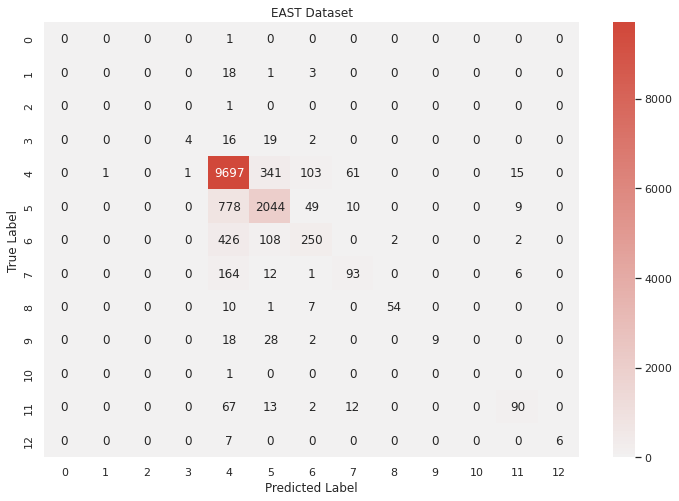

In [ ]:
############################# PLEASE MAKE SURE TO STRATIFY BEFORE RUNNIG THIS ###############
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns; sns.set(style='white')
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5',
                             '6','7','8','9',
                             '10','11','12'],
                     columns = ['0','1','2','3','4','5',
                             '6','7','8','9',
                             '10','11','12'])

#Plot the heatmap
#fix_plotly_colab()
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title("EAST Dataset")
sns.heatmap(cm_df,
        center=0,
            cmap=sns.diverging_palette(220, 15, as_cmap=True),
            annot=True,
            fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [ ]:
## is a Python package which helps to debug machine learning classifiers and explain their predictions
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.3 MB/s 
     |████████████████████████████████| 133 kB 63.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5b893b09b4a606c5c28297182f78760e12a87d11905cfe5eaedc1ce8b6008e96
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5
eli5.show_weights(estimator = clf, vec= vectorizer,top=100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_trainframe = X_train.to_frame()

In [ ]:
X_testframe = X_test.to_frame()

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 8.2 MB/s 
     |████████████████████████████████| 287 kB 56.6 MB/s 


In [ ]:
import contractions

**MIND DATASET**

In [ ]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import sklearn
from abc import ABCMeta, abstractmethod
from typing import Dict, Tuple
from sklearn.base import BaseEstimator,TransformerMixin,_OneToOneFeatureMixin,ClassifierMixin
from sklearn.utils.validation import check_X_y
from sklearn.feature_extraction.text import TfidfVectorizer,_VectorizerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils import _IS_32BIT
from sklearn.utils.validation import check_is_fitted, check_array, FLOAT_DTYPES, check_scalar
from sklearn.utils.extmath import safe_sparse_dot
class RuleAugmentedEstimator(BaseEstimator,ClassifierMixin):
    """Augments sklearn estimators with rule-based logic.
    This class is a wrapper class for sklearn estimators with the additional
    possibility of adding rule-based logic to the underlying estimator.
    The provided rules are hard-coded and take precedence over the underlying
    estimator's predictions.
    """
    def __init__(self, base_model: BaseEstimator):

        self.dtype = np.float64
        self.base_model = base_model
        self.tokenizer = None
        self.preprocessor = None
        self.C = 1.0
        self.tol = 1e-4
        self.epsilon = 0.0
        self.class_weight="balanced"
        self.fit_intercept = True
        self.intercept_scaling = 1.0
        self.verbose = 0
        self.random_state = None
        self.max_iter = 1000
        self.dual = True
        self.loss = "epsilon_insensitive"
        self.penalty="l2"
        self.multi_class="ovr"
        #self._tfidf = TfidfTransformer(norm="l2", use_idf=True, smooth_idf=True, sublinear_tf=False)
        super().__init__()
    def  _pre_process(self, X_trainframe):

            X_trainframe['abstract'] = X_trainframe['abstract'].apply(lambda x: contractions.fix(x))
            X_trainframe['abstract'] = X_trainframe['abstract'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
            X_trainframe['abstract'] = X_trainframe['abstract'].apply(lambda x: re.sub('[^\w\s]', ' ', str(x)))

            return X_trainframe

         ## Hand-Crafted keywords based on Domain-Knowledge for only 3 classes suffering from poor accuracies due to overlap
    def  _rules2classify(self, X_trainframe):
        ## Note: input to this method is a list not a string
        video_Keywords = ['dignam',
	'cnn',
	'reports',
	'buzz60',
	'insideedition',
	'weighs',
	'argues',
	'benjamin',
	'colette',
	'reaction',
	'goelman',
	'reacts',
	'amb',
	'spitz',
	'jonah',
	'swalwell',
	'spacesuits',
	'pep',
	'garay',
	'molly',
	'melber',
	'hugs',
	'communion',
	'emer',
	'raw',
	'fmr',
	'speaks',
	'impeachment',
	'pres',
	'veuer',
	'andrea',
	'lynagh',
	'gavino',
	'becky',
	'mercer',
	'hayes',
	'parliamentary',
	'eve',
	'scarborough',
	'discusses']
        news_Keywords = ['cbs46'
	'apple',
	'police',
	'sacramento',
	'islamic',
	'pixel',
	'custody',
	'colleagues',
	'google',
	'iran',
	'election',
	'senate',
	'victim',
	'shooting',
	'iphone',	'robbery',
	'attacked',
	'echo',
	'ios',
	'amendments',
	'nypd',
	'identified',
	'whatsapp',
  'robot',
  'alexa']

        new = pd.DataFrame()
        # how many apps, services & Platform/Console patterns are in the text?
        new['video'] = X_trainframe.abstract.apply(lambda x: sum([x.count(word) for word in video_Keywords]))
        new['news'] = X_trainframe.abstract.apply(lambda x: sum([x.count(word) for word in news_Keywords]))

        a_series = (new != 0).any(axis=1)
        new_df = new.loc[a_series]
        #new[['news','video']].eq(0).all(1)
        new_df['category']  = new_df[['video','news']].idxmax(axis=1)

        return new_df

    def _check_params(self):
        if self.dtype not in FLOAT_DTYPES:
            warnings.warn(
                "Only {} 'dtype' should be used. {} 'dtype' will "
                "be converted to np.float64.".format(FLOAT_DTYPES, self.dtype),
                UserWarning,
            )


    def _warn_for_unused_params(self):

        if self.tokenizer is not None and self.token_pattern is not None:
            warnings.warn(
                "The parameter 'token_pattern' will not be used"
                " since 'tokenizer' is not None'"
            )

        if self.preprocessor is not None and callable(self.analyzer):
            warnings.warn(
                "The parameter 'preprocessor' will not be used"
                " since 'analyzer' is callable'"
            )
    def decision_function(self, X):
        LinearSVC.decision_function(self,X)
    def __repr__(self):
        return "Rule Augmented Estimator:\n\n\t Base Model: {}\n\t Rules: {}".format(self.base_model, self.rules)

    def __str__(self):
         return self.__str__

    def _get_base_model_data(self, X:pd.DataFrame, y):
        """Filters the trainig data for data points not affected by the rules."""

        #print("I'm here at the top:) :)")
        #train_x = X
        # Resetting Indices
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        #y = y.iloc[X.index.values]

        cleaned_frame = self._pre_process(X)
        rules_frame = self._rules2classify(cleaned_frame)
        Xrules = X.loc[rules_frame.index.values]
        yrules = y.iloc[Xrules.index.values]
        ## Dropping all the rows affected by the rules and keeping only those not affected
        X = X.drop(rules_frame.iloc[:,:].index)
        y = y.iloc[X.index.values]
        #print("Train_x after dropping rules:",X)
        #X = X.reset_index(drop=True)
        #indices = X.index.values

        #y = y.iloc[indices]
        #print("Train_y after dropping rules:",y)
        #X = X.reset_index(drop=True)
        #y = y.reset_index(drop=True)
        #print("AFter resetting:",X,y)
        return X, y, Xrules, yrules

    def fit(self, X, y, sample_weight=None):

        LinearSVC.fit(self, X, y, sample_weight=None)

    def predict(self, X):

       LinearSVC.predict(self,X)

    def get_params(self, deep: bool = True) -> Dict:
        """Return the model's and base model's parameters.
        Args:
            deep: Whether to recursively return the base model's parameters.
        Returns
            Dict: The model's parameters.
        """
        params = {'base_model': self.base_model,
                  'outcome_range': self.outcome_range,

                 }

        params.update(self.base_model.get_params(deep=deep))
        return params



**MAST Dataset**

In [ ]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import sklearn
from abc import ABCMeta, abstractmethod
from typing import Dict, Tuple
from sklearn.base import BaseEstimator,TransformerMixin,_OneToOneFeatureMixin,ClassifierMixin
from sklearn.utils.validation import check_X_y
from sklearn.feature_extraction.text import TfidfVectorizer,_VectorizerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils import _IS_32BIT
from sklearn.utils.validation import check_is_fitted, check_array, FLOAT_DTYPES, check_scalar
from sklearn.utils.extmath import safe_sparse_dot
class RuleAugmentedEstimator(BaseEstimator,ClassifierMixin):
    """Augments sklearn estimators with rule-based logic.
    This class is a wrapper class for sklearn estimators with the additional
    possibility of adding rule-based logic to the underlying estimator.
    The provided rules are hard-coded and take precedence over the underlying
    estimator's predictions.
    """
    def __init__(self, base_model: BaseEstimator):

        self.dtype = np.float64
        self.base_model = base_model
        self.tokenizer = None
        self.preprocessor = None
        self.C = 1.0
        self.tol = 1e-4
        self.epsilon = 0.0
        self.class_weight="balanced"
        self.fit_intercept = True
        self.intercept_scaling = 1.0
        self.verbose = 0
        self.random_state = None
        self.max_iter = 1000
        self.dual = True
        self.loss = "epsilon_insensitive"
        self.penalty="l2"
        self.multi_class="ovr"
        #self._tfidf = TfidfTransformer(norm="l2", use_idf=True, smooth_idf=True, sublinear_tf=False)
        super().__init__()
    def  _pre_process(self, X_trainframe):

            X_trainframe['body'] = X_trainframe['body'].apply(lambda x: contractions.fix(x))
            X_trainframe['body'] = X_trainframe['body'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
            X_trainframe['body'] = X_trainframe['body'].apply(lambda x: re.sub('[^\w\s]', ' ', str(x)))

            return X_trainframe

         ## Hand-Crafted keywords based on Domain-Knowledge for only 3 classes suffering from poor accuracies due to overlap
    def  _rules2classify(self, X_trainframe):
        ## Note: input to this method is a list not a string
        four_Keywords = ['codes',
	'confluence',
	'submitted',
	'submit',
	'locked',
	'expense',
	'mailbox',
	'approval',
	'approver',
	'pipeline',
	'colombia',
	'view',
	'content',
	'decline',
	'layouts',
	'salary',
	'timecard',
	'field',
	'sheet',
	'contractor',
	'wants',
	'zephyr',
	'mailing',
	'manage',
	'requisitions',
	'contracts',
	'creating',
	'holiday',
	'extensions',
	'recruiter',
	'bounce',
	'holidays',
	'level',
	'busy',
	'opportunity',
	'code',
	'administrators',
	'entered',
	'sonar',
	'why',
	'denied',
	'selected',
	'created',
	'upload',
	'change',
'booking',
	'detailed',
	'role',
	'deleting',
	'discipline',
	'receiving',
	'snow',
	'materials',
	'book',
	'filters',
	'mails']
        six_Keywords = ['routine'
	'stag',
	'turnstile',
	'mainly',
	'circuit',
	'hosts',
	'backed',
	'omit',
	'elastic',
	'deployed',
	'sec',
	'terminal',
	'we',
	'snapshot',
	'networks',
	'auditors',
	'calc',
	'cluster',
	'cores',
	'lasted',
	'shutdown',
	'speeds',
	'dedicated',
	'fiber',
	'router',
	'retries',
	'trays',
	'serial',
	'mappings',
	'propose',
	'kernel',
	'raid']

        new = pd.DataFrame()
        # how many apps, services & Platform/Console patterns are in the text?
        new['four'] = X_trainframe.body.apply(lambda x: sum([x.count(word) for word in four_Keywords]))
        new['six'] = X_trainframe.body.apply(lambda x: sum([x.count(word) for word in six_Keywords]))

        a_series = (new != 0).any(axis=1)
        new_df = new.loc[a_series]
        #new[['news','video']].eq(0).all(1)
        new_df['category']  = new_df[['four','six']].idxmax(axis=1)

        return new_df

    def _check_params(self):
        if self.dtype not in FLOAT_DTYPES:
            warnings.warn(
                "Only {} 'dtype' should be used. {} 'dtype' will "
                "be converted to np.float64.".format(FLOAT_DTYPES, self.dtype),
                UserWarning,
            )


    def _warn_for_unused_params(self):

        if self.tokenizer is not None and self.token_pattern is not None:
            warnings.warn(
                "The parameter 'token_pattern' will not be used"
                " since 'tokenizer' is not None'"
            )

        if self.preprocessor is not None and callable(self.analyzer):
            warnings.warn(
                "The parameter 'preprocessor' will not be used"
                " since 'analyzer' is callable'"
            )
    def decision_function(self, X):
        LinearSVC.decision_function(self,X)
    def __repr__(self):
        return "Rule Augmented Estimator:\n\n\t Base Model: {}\n\t Rules: {}".format(self.base_model, self.rules)

    def __str__(self):
         return self.__str__

    def _get_base_model_data(self, X:pd.DataFrame, y):
        """Filters the trainig data for data points not affected by the rules."""

        #print("I'm here at the top:) :)")
        #train_x = X
        # Resetting Indices
        X = X.reset_index(drop=True)
        y = y.reset_index(drop=True)
        #y = y.iloc[X.index.values]

        cleaned_frame = self._pre_process(X)
        rules_frame = self._rules2classify(cleaned_frame)
        Xrules = X.loc[rules_frame.index.values]
        yrules = y.iloc[Xrules.index.values]
        ## Dropping all the rows affected by the rules and keeping only those not affected
        X = X.drop(rules_frame.iloc[:,:].index)
        y = y.iloc[X.index.values]
        #print("Train_x after dropping rules:",X)
        #X = X.reset_index(drop=True)
        #indices = X.index.values

        #y = y.iloc[indices]
        #print("Train_y after dropping rules:",y)
        #X = X.reset_index(drop=True)
        #y = y.reset_index(drop=True)
        #print("AFter resetting:",X,y)
        return X, y, Xrules, yrules

    def fit(self, X, y, sample_weight=None):

        LinearSVC.fit(self, X, y, sample_weight=None)

    def predict(self, X):

       LinearSVC.predict(self,X)

    def get_params(self, deep: bool = True) -> Dict:
        """Return the model's and base model's parameters.
        Args:
            deep: Whether to recursively return the base model's parameters.
        Returns
            Dict: The model's parameters.
        """
        params = {'base_model': self.base_model,
                  'outcome_range': self.outcome_range,

                 }

        params.update(self.base_model.get_params(deep=deep))
        return params



## Get Training Accuarcy

In [ ]:
hybrid_model = RuleAugmentedEstimator(svm)
X, y, Xrules, yrules  = hybrid_model._get_base_model_data(X_trainframe,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ytrain = pd.concat([y,yrules],axis=0)

In [ ]:
Xtfidf = vectorizer.fit_transform(X.squeeze())
svm.fit(Xtfidf,y)
y_pred_svm = svm.predict(Xtfidf)

In [ ]:
y_pred = pd.Series(y_pred_svm)
y_pred.index = y.index
ycombined =pd.concat([y_pred,yrules],axis=0)

In [ ]:
print("\n\n Training Accuracy for Hybridsvm :", metrics.f1_score(ytrain, ycombined, average= 'weighted'))
print(classification_report(ytrain, ycombined))



 Training Accuracy for Hybridsvm : 0.9584898834451491
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.97      0.74      0.84        50
           2       1.00      1.00      1.00         2
           3       1.00      0.72      0.84        96
           4       0.96      0.99      0.97     23842
           5       0.95      0.92      0.94      6744
           6       0.97      0.83      0.89      1840
           7       0.89      0.78      0.83       645
           8       1.00      0.96      0.98       167
           9       0.99      0.93      0.96       134
          10       1.00      1.00      1.00         1
          11       0.97      0.92      0.94       428
          12       1.00      0.91      0.95        32

    accuracy                           0.96     33984
   macro avg       0.98      0.87      0.92     33984
weighted avg       0.96      0.96      0.96     33984



**Get Testing Accuarcy**

In [ ]:
hybrid_model = RuleAugmentedEstimator(svm)
X, y, Xrules, yrules  = hybrid_model._get_base_model_data(X_testframe,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
ytest = pd.concat([y,yrules],axis=0)

In [ ]:
X_test_tfidf = vectorizer.transform(X.squeeze())
#y_pred = svm.predict(X_test_tfidf)
y_pred = model_selection.cross_val_predict(svm, X_test_tfidf, y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


In [ ]:
y_pred = pd.Series(y_pred)
y_pred.index = y.index
ycombinedtest =pd.concat([y_pred,yrules],axis=0)

In [ ]:
print("\n\n Testing Accuracy for Hybridsvm :", metrics.f1_score(ytest, ycombinedtest, average= 'weighted'))
print(classification_report(ytest, ycombinedtest))



 Testing Accuracy for Hybridsvm : 0.9205085438660618
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.90      0.41      0.56        22
           2       1.00      1.00      1.00         1
           3       1.00      0.46      0.63        41
           4       0.93      0.97      0.95     10219
           5       0.90      0.86      0.88      2890
           6       0.90      0.70      0.79       788
           7       0.80      0.67      0.73       276
           8       1.00      0.93      0.96        72
           9       1.00      0.81      0.89        57
          10       1.00      1.00      1.00         1
          11       0.91      0.73      0.81       184
          12       1.00      0.85      0.92        13

    accuracy                           0.92     14565
   macro avg       0.95      0.80      0.86     14565
weighted avg       0.92      0.92      0.92     14565



Text(84.5, 0.5, 'True Label')

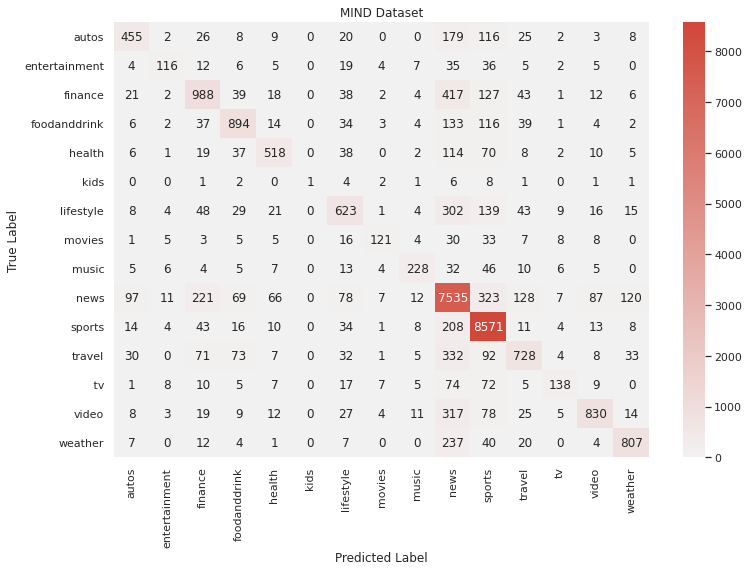

In [ ]:
cm = confusion_matrix(ytest, ycombinedtest)
import seaborn as sns; sns.set(style='white')
cm_df = pd.DataFrame(cm,
                     index = ['autos','entertainment','finance', 'foodanddrink','health',
                             'kids','lifestyle','movies',
                             'music','news','sports','travel',' tv','video','weather'],
                     columns = ['autos','entertainment','finance', 'foodanddrink','health',
                             'kids','lifestyle','movies',
                             'music','news','sports','travel','tv','video','weather'])
#Plot the heatmap

#fix_plotly_colab()
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title("MIND Dataset")
sns.heatmap(cm_df,
        center=0,
            cmap=sns.diverging_palette(220, 15, as_cmap=True),
            annot=True,
            fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

Text(84.5, 0.5, 'True Label')

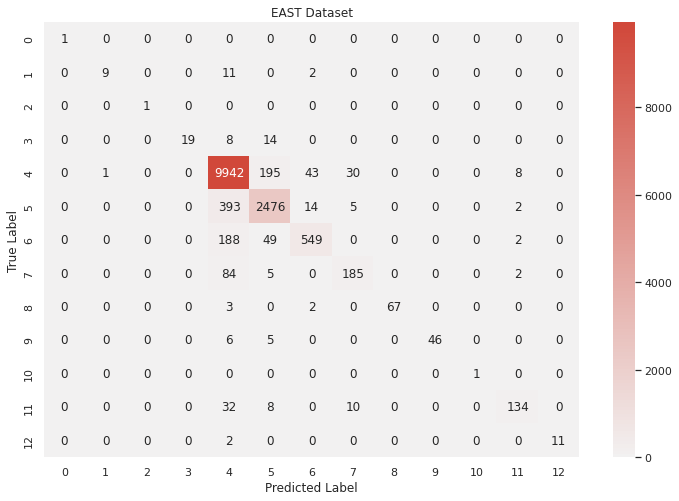

In [ ]:
cm = confusion_matrix(ytest, ycombinedtest)
import seaborn as sns; sns.set(style='white')
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5',
                             '6','7','8','9',
                             '10','11','12'],
                     columns = ['0','1','2','3','4','5',
                             '6','7','8','9',
                             '10','11','12'])

#Plot the heatmap
#fix_plotly_colab()
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title("EAST Dataset")
sns.heatmap(cm_df,
        center=0,
            cmap=sns.diverging_palette(220, 15, as_cmap=True),
            annot=True,
            fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")